In [7]:
import pandas as pd
import time as tm
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # plot heatmap

In [8]:
data_loc = 'us'
#us_period = '1'
file = f'../../dataset/{data_loc}.csv' # choose the file want to read

df = pd.read_csv(file)  # read csv
df = pd.DataFrame(df) # trans into dataframe

time_start = tm.time() #開始計時

ip_time = dict()
special_chr = ["{", "}", "'", ":", " "]

vpn_nan = 0
vpn_server = dict()
for i in range(len(df)):
    # vpn_server
    vpn_point = df['vpnServerId'][i]
    if (pd.isna(vpn_point)): vpn_nan+=1
    elif vpn_point not in vpn_server: vpn_server[vpn_point] = 1
    elif vpn_point in vpn_server: vpn_server[vpn_point] += 1
        
    # ip_time
    raw_points = df['transactionList'][i]
    points = ''.join(e for e in raw_points if e not in special_chr)
    points = points.split(",")
    for j in range(len(points)):
        time = points[j][:17]
        ip = points[j][17:]
        if ip not in ip_time:
            ip_time[ip] = [time]
        else:
            ip_time[ip].append(time)

total_num = len(ip_time)
print(f'num of total server: {total_num}')
print(f'vpn_nan: {vpn_nan}')
print(vpn_server)
time_end = tm.time()
time_c = time_end - time_start
print(f'time cost: {time_c}') # about (sec)
print(f'the size of data {len(df)}')

C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


num of total server: 619
vpn_nan: 157086
{'us8261': 93, 'us6286': 23667, 'us8262': 29627, 'us8667': 38461, 'us8258': 6627, 'us8275': 2088, 'us8272': 26600}
time cost: 72.27888917922974
the size of data 284249


In [9]:
dates = []

if data_loc == 'us':
    dates.append(['2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'])
    dates.append(['2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
                '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16'])

In [10]:
# dataset pre-processing
# select specific period from ip_time

def get_ip_time(ip_data=ip_time, period='2021', period_ip_time=None): # period_ip_time: use to accumulate date
    if period_ip_time is None:
        period_ip_time = dict()
    if type(period) == str:
        len_p = len(period)
        for ip in ip_data:
            for time in ip_data[ip]:
                if time[0:len_p] == period:
                    if ip not in period_ip_time:
                        period_ip_time[ip] = [time]
                    else:
                        period_ip_time[ip] += [time]
    elif type(period) == list: #[time_1, time_2, ...]
        period_ip_time = get_ip_time(period=period[0])
        for time_i in period[1:]:
            period_ip_time = get_ip_time(period=time_i, period_ip_time=period_ip_time)
    return period_ip_time

#data_2021 = get_ip_time(period='2021')

data_period_0 = get_ip_time(ip_data=ip_time, period=dates[0])
data_period_1 = get_ip_time(ip_data=ip_time, period=dates[1])

In [11]:
# setup hour axis for below chart
hour_axis = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
             '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

print(f'p0: num of ip={len(data_period_0)}')
print(f'p1: num of ip={len(data_period_1)}')

# sort time in data_ip_time (of each ip)
for ip in data_period_0:
    data_period_0[ip] = sorted(data_period_0[ip])
for ip in data_period_1:
    data_period_1[ip] = sorted(data_period_1[ip])

# check result
for key, value in data_period_0.items():
    print(key)
    print(value[0:5])
    break
for key, value in data_period_1.items():
    print(key)
    print(value[0:5])
    break

p0: num of ip=322
p1: num of ip=538
52.223.228.27
['2021-04-29T000534', '2021-04-29T000534', '2021-04-29T001530', '2021-04-29T004147', '2021-04-29T004507']
52.223.228.27
['2021-05-07T000111', '2021-05-07T000455', '2021-05-07T000715', '2021-05-07T001040', '2021-05-07T001447']


In [12]:
# s_dbw_record

# period-0
s_dbw_record_p0 = []
s_dbw_file_path = f'../Af_oral/us_period_0/p0_cluster_result/s_dbw_record.csv'
df_sdbw = pd.read_csv(s_dbw_file_path)
df_sdbw.head()
for n_cluster in range(7): # n_cluster=2~8
    for label in range(10):
        s_dbw_record_p0.append(df_sdbw['S_Dbw'][n_cluster*10+label])

# period-1
s_dbw_record_p1 = []
s_dbw_file_path = f'../Af_oral/us_period_1/p0_cluster_result/s_dbw_record.csv'
df_sdbw = pd.read_csv(s_dbw_file_path)
df_sdbw.head()
for n_cluster in range(7): # n_cluster=2~8
    for label in range(10):
        s_dbw_record_p1.append(df_sdbw['S_Dbw'][n_cluster*10+label])

# show result
print(f's_dbw_record_0: {s_dbw_record_p0[:10]}')
print(f's_dbw_record_0: {s_dbw_record_p0[10:20]}')

s_dbw_record_0: [1.929567077864769, 1.929567077864769, 1.929567077864769, 0.874330275212142, 0.874330275212142, 0.874330275212142, 0.874330275212142, 2.2513733403197342, 1.929567077864769, 2.341866856865477]
s_dbw_record_0: [0.4945485041261116, 0.958034468685008, 0.9949159737658207, 1.2253946317331117, 0.4945485041261116, 0.4945485041261116, 0.9585224280735936, 1.2364989391605272, 0.4945485041261116, 0.4945485041261116]


In [13]:
# caculate baseline - number of servers in one date

# period_0
ip_date_dict_p0 = dict()
for ip in data_period_0:
    for time in data_period_0[ip]:
        date = time[5:10]
        if date not in ip_date_dict_p0:
            ip_date_dict_p0[date] = [ip]
        elif ip not in ip_date_dict_p0[date]:
            ip_date_dict_p0[date].append(ip)
# baseline
baseline_ip_sum_p0 = []
for date in sorted(ip_date_dict_p0):
    print(date)
    baseline_ip_sum_p0.append(len(ip_date_dict_p0[date]))
print(f'baseline_ip_sum_p0: {baseline_ip_sum_p0}')
    
# period_1
ip_date_dict_p1 = dict()
for ip in data_period_1:
    for time in data_period_1[ip]:
        date = time[5:10]
        if date not in ip_date_dict_p1:
            ip_date_dict_p1[date] = [ip]
        elif ip not in ip_date_dict_p1[date]:
            ip_date_dict_p1[date].append(ip)
# baseline
baseline_ip_sum_p1 = []
for date in sorted(ip_date_dict_p1):
    print(date)
    baseline_ip_sum_p1.append(len(ip_date_dict_p1[date]))
print(f'baseline_ip_sum_p1: {baseline_ip_sum_p1}')


04-29
04-30
05-01
05-02
05-03
05-04
05-05
baseline_ip_sum_p0: [314, 314, 303, 321, 285, 313, 321]
05-07
05-08
05-09
05-10
05-11
05-12
05-13
05-14
05-15
05-16
baseline_ip_sum_p1: [499, 521, 485, 473, 492, 494, 492, 491, 490, 319]


In [14]:
# hour_period - fix to n_periods=3, slide_hour=0

n_periods=3
slide_hour=0

hour_period = []
period_len=24//n_periods
for i in range(n_periods-1):
    hour_period.append(hour_axis[period_len*i+slide_hour : period_len*(i+1)+slide_hour])
hour_period.append(hour_axis[period_len*(n_periods-1) + slide_hour:] + hour_axis[:slide_hour])

hour_period

[['00', '01', '02', '03', '04', '05', '06', '07'],
 ['08', '09', '10', '11', '12', '13', '14', '15'],
 ['16', '17', '18', '19', '20', '21', '22', '23']]

In [15]:
# caculate 3-period transaction count for each IP

def get_ip_periods_count(ip, ip_time, hour_period=hour_period):
    hour_count = np.zeros((len(hour_period),), dtype=int)
    for time in ip_time[ip]: # hour = time[11:13]
        for i in range(len(hour_period)):
            if time[11:13] in hour_period[i]:
                hour_count[i] += 1
    return hour_count

def get_avg_3p_trans_count(ip_list, ip_trans_count_dict):
    sum_3p_trans_count = np.zeros((len(hour_period),), dtype=int)
    for ip in ip_list:
        sum_3p_trans_count += ip_trans_count_dict[ip]
    return sum_3p_trans_count/len(ip_list)

# period_0
ip_trans_count_dict_p0 = dict()
for ip in data_period_0:
    ip_trans_count_dict_p0[ip] = get_ip_periods_count(ip=ip, ip_time=data_period_0)
    
# period_1
ip_trans_count_dict_p1 = dict()
for ip in data_period_1:
    ip_trans_count_dict_p1[ip] = get_ip_periods_count(ip=ip, ip_time=data_period_1)

# show result
i=0
test_ip_list = []
for ip in ip_trans_count_dict_p0:
    print(f'{ip}: {ip_trans_count_dict_p0[ip]}(p0), {ip_trans_count_dict_p1[ip]}(p1)')
    test_ip_list.append(ip)
    i += 1
    if i>5: break
#
print(f'get_avg_3p_trans_count: {get_avg_3p_trans_count(ip_list=test_ip_list, ip_trans_count_dict=ip_trans_count_dict_p0)}')

52.223.228.27: [ 1056 11618  1192](p0), [ 1214 15864  1740](p1)
52.223.228.62: [ 957 9386 1165](p0), [  73 1125  142](p1)
52.223.228.95: [  987 11068  1049](p0), [ 1180 15589  1525](p1)
52.223.227.232: [ 1086 10977  1141](p0), [ 1294 16897  1799](p1)
52.223.228.106: [ 1076 11455  1114](p0), [ 113 1323  177](p1)
52.223.228.7: [ 1133 10946  1243](p0), [ 1223 16292  1632](p1)
get_avg_3p_trans_count: [ 1049.16666667 10908.33333333  1150.66666667]


In [16]:
# caculate baseline in classes
def baseline_class(period_choose, n_cluster, label):
    id_index_path = f'./{data_loc}_period_{period_choose}/p1_capture_history/ip_index.txt'
    with open(id_index_path) as f:
        ip_index = f.readlines()
    group_path = f'./{data_loc}_period_{period_choose}/p1_capture_history/n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
        
    if period_choose == 0:
        ip_date_dict = ip_date_dict_p0
    elif period_choose == 1:
        ip_date_dict = ip_date_dict_p1
    baseline_ip_num_class = []
    #baseline_ip_3p_trans_count = []
    for date in sorted(ip_date_dict):
        #print(date)
        baseline_ip_num_class.append([]) # new date
        for i in range(n_cluster):
            baseline_ip_num_class[-1].append(0) # each class number
        for i in range(len(ip_index)):
            ip = ip_index[i][:-1] # last two is '\n'
            group = int(groups[i][5]) # class0, class1, ...
            if ip in ip_date_dict[date]:
                baseline_ip_num_class[-1][group] += 1
                
        # 3-period_trans_count
        #for ip in ip_date_dict[date]:
    # change to format: [[class_0], [class_1], ...]
    out_baseline_ip_num_class = []
    for _class in range(n_cluster):
        out_baseline_ip_num_class.append([])
        for date in range(len(baseline_ip_num_class)):
            out_baseline_ip_num_class[-1].append(baseline_ip_num_class[date][_class])
            
    # ip index for each class
    baseline_ip_index_class = []
    for i in range(n_cluster):
        baseline_ip_index_class.append([]) # each class
    for i in range(len(ip_index)):
        ip = ip_index[i][:-1] # last two is '\n'
        group = int(groups[i][5]) # class0, class1, ...
        baseline_ip_index_class[group].append(ip)
    return out_baseline_ip_num_class, baseline_ip_index_class


In [17]:
# get subnet (transform baseline_ip_index_class -> subnet(number))
def get_subnet(baseline_ip_index_class):
    subnet_index = dict()
    for ip in baseline_ip_index_class:
        subnet = ip[:10]
        if subnet not in subnet_index:
            subnet_index[subnet] = [ip]
        elif ip not in subnet_index[subnet]:
            subnet_index[subnet].append(ip)
            
    subnet_num_index = dict()
    for subnet in subnet_index:
        subnet_num_index[subnet] = len(subnet_index[subnet])
        
    return subnet_num_index

In [18]:
# Get the capture_p from R
def r_label_2_p2(period_choose, n_cluster, label):
    file_path = f'./{data_loc}_period_{period_choose}/R_capture_probability/n_cluster_{n_cluster}/r_{label}.txt'
    with open(file_path) as f:
        lines = f.readlines()
    # locate the p
    start=100000
    end=0
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for i in range(len(lines)):
        if lines[i][:2] == '$p':
            start=i+1
        elif lines[i] == lines[-3]:
            end=i
    CJS_time_use = float(lines[-1][19:-6])
    # record class, time, est
    class_loc, time_loc = 0,0 # new: for locate where the class and time in one line
    for i in range(len(lines[start])):
        if lines[start][i]=='c': # cluster
            if lines[start][i+1]=='l' and lines[start][i+6]=='r':
                class_loc=i+6
        elif lines[start][i]=='t': # time
            if lines[start][i+1]=='i': # avoid 'estimate'
                if lines[start][i+3]=='e':
                    time_loc=i+3
    class_record = []
    time_record = []
    est_record = [] # ex: 6.197041e-01
    for line in lines[start+1:-2]:
        #print(line)
        class_record.append(int(line[class_loc]))
        if line[time_loc-1] in numbers:
            time_record.append(int(line[time_loc-1:time_loc+1]))
        else:
            time_record.append(int(line[time_loc]))
        est_record.append(float(line[time_loc+6:-1]))
    
    clusters = np.unique(class_record)
    num_cluster = len(clusters)
    time_len = len(dates[period_choose])-1 # time = 2 ~ last date
    est_p_sort = [] # [[], []] num of class = num of list()
    for i in range(num_cluster):
        est_p_sort.append([])
        for j in range(time_len):
            est_p_sort[-1].append(0) # est num will be 'INF' if append '0' and some data not load 
    for i in range(len(time_record)):
        #print(f'class_record: {class_record[i]}, time_record: {time_record[i]}, est_record: {est_record[i]}')
        est_p_sort[class_record[i]][time_record[i]-2] = est_record[i]
    return est_p_sort, CJS_time_use


In [19]:
# Get the capture history from p1
def get_p1_caputure_history(period_choose, n_cluster, label):
    label_path = f'./{data_loc}_period_{period_choose}/p1_capture_history/n_cluster_{n_cluster}/label_{label}.txt'
    with open(label_path) as f:
        chs = f.readlines()
    group_path = f'./{data_loc}_period_{period_choose}/p1_capture_history/n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
    ch_in_class = [] # [[capture_history in class-0], [capture_history in class-1], ...]
    for i in range(n_cluster):
        ch_in_class.append([])
    for i in range(len(chs)):
        group = int(groups[i][5])
        ch_in_class[group].append(chs[i][:-1]) # last 2 is \n
        
    sum_ch_in_class = [] # [[sample number in class-0], [sample number in class-1], ...]
    for _class in range(len(ch_in_class)): # class
        sum_class = []
        for date in range(len(dates[period_choose])):
            sum_class.append(0)
            for j in range(len(ch_in_class[_class])): # servers in a class
                sum_class[date] += int(ch_in_class[_class][j][date])
        sum_ch_in_class.append(sum_class)
    return sum_ch_in_class, ch_in_class

In [20]:
# del nan in the list
def get_del_nan_list(_list):
    del_nan_list = []
    for i in range(len(_list)):
        if np.isnan(_list[i]):
            del_nan_list.append(i)
    print(f'del list: {del_nan_list}')
    return np.delete(_list, del_nan_list), del_nan_list # deleted list, delete index (for other list)

In [21]:
# show detail
# estimation number = 0 on one date
period_choose = 0
n_clusters = [2,3,4,5,6,7,8]
s_dbw_upper_limit = 0.3 # for compare lower S_Dbw with k-means and random clustering

# dataFrame for correlation
data_df = pd.DataFrame(columns = ['n_cluster', 'err', 'S_Dbw', 'est_0_class', 'est_0_ip'], index=list(range(70)))
std_avg_est_0_class = []

if period_choose == 0:
    ip_trans_count_dict = ip_trans_count_dict_p0
    baseline_ip_sum = baseline_ip_sum_p0
    s_dbw_record = s_dbw_record_p0
elif period_choose == 1:
    ip_trans_count_dict = ip_trans_count_dict_p1
    baseline_ip_sum = baseline_ip_sum_p1
    s_dbw_record = s_dbw_record_p1
    
# how many (class or ip) est_number = 0 one one date
which_date_est_0 = []
for n_cluster in n_clusters:
    num_0_est_class_list, num_0_est_ip_list = [], []
    print(f'\nn_cluster: {n_cluster}')
    for label in range(10):
        #print(f'\nlabel: {label}')
        index = (n_cluster-2)*10 + label
        # baseline number in class
        baseline_num_class, class_ip_index = baseline_class(period_choose, n_cluster, label)
        baseline_num_class = np.array(baseline_num_class)

        # estimation number in class
        est_p, _ = r_label_2_p2(period_choose, n_cluster, label)
        sum_ch, ch_in_class = get_p1_caputure_history(period_choose, n_cluster, label)
        est_p, sum_ch = np.array(est_p), np.array(sum_ch)
        est_num_class = sum_ch[:, 1:] / est_p
        est_sum = np.sum(est_num_class, axis=0)
        #print(f'mean err: {np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])}')
        
        if s_dbw_record[index] > s_dbw_upper_limit: # for compare lower S_Dbw with k-means and random clustering
            continue
            
        data_df['n_cluster'][index] = n_cluster
        data_df['err'][index] = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])
        data_df['S_Dbw'][index] = s_dbw_record[index]
        
        err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
        #print(f'err_class: {err_class}')
        num_0_est_class = 0 # one date est number = 0 (baseline != 0)
        num_0_est_ip = 0
        for _class in range(n_cluster):
            std_avg = np.std(sum_ch[_class])/np.mean(sum_ch[_class])
            #print(f'\nstd/avg: {std_avg}')
            #print(f'sum_ch: {sum_ch[_class]}')
            #print(f'est_num_class: {est_num_class[:,1:-2][_class]}')
            #print(f'baseline_num_class: {baseline_num_class[:,2:-2][_class]}')
            #print(f'mean err_class: {np.mean(err_class[_class])}')
            #print(f'err_class: {err_class[_class]}')
            err_mean = np.mean(err_class[_class])
            #print(f'err_mean: {err_mean}\n')
            for num_date in range(len(err_class[_class])):
                num_date_est_0 = 0 # one date est number = 0 -> skip
                if num_date_est_0 > 0:
                    print('over one date est num = 0')
                    continue
                if est_num_class[:,1:-2][_class][num_date]==0 and baseline_num_class[:,2:-2][_class][num_date]!=0:
                    #print('est err: 0 in sample')
                    #print(f'std/avg: {std_avg}')
                    std_avg_est_0_class.append(std_avg)
                    #print(f'est_num_class: {est_num_class[:,1:-2][_class]}')
                    #print(f'baseline_num_class: {baseline_num_class[:,2:-2][_class]}')
                    #print(f'class_subnet_index: {get_subnet(class_ip_index[_class])}')
                    #print(f'class_avg_3p_trans_count: {get_avg_3p_trans_count(class_ip_index[_class], ip_trans_count_dict)}')
                    num_0_est_class += 1
                    num_0_est_ip += len(class_ip_index[_class])
                    num_date_est_0 += 1
                    which_date_est_0.append(num_date)
            for err in err_class[_class]:
                if err > 0.1:
                    pass
        #print(f'num_0_est_class: {num_0_est_class}')
        #print(f'num_0_est_ip: {num_0_est_ip}')
        num_0_est_class_list.append(num_0_est_class)
        num_0_est_ip_list.append(num_0_est_ip)
        data_df['est_0_class'][index] = num_0_est_class
        data_df['est_0_ip'][index] = num_0_est_ip

    # print
    print(f'num_0_est_class: {num_0_est_class_list}')
    print(f'num_0_est_ip: {num_0_est_ip_list}')
    
# Delete these row indexes from dataFrame
indexNames = data_df[ data_df['err'] == 'None' ].index
print(f'drop None index: {indexNames}')
data_df.drop(indexNames , inplace=True)

data_df = data_df.dropna() # drop nan row


# std/avg 
std_avg_est_0_class = np.array(std_avg_est_0_class)
print('\nstd/avg of est=0 classes')
print(f'mean std/avg: {np.mean(std_avg_est_0_class)}')
print(f'std std/avg: {np.std(std_avg_est_0_class)}')

# which date est num = 0
which_date_est_0_dict = dict()
for date in which_date_est_0:
    if date not in which_date_est_0_dict:
        which_date_est_0_dict[date] = 1
    else:
        which_date_est_0_dict[date] += 1
print(f'which_date_est_0: {which_date_est_0_dict}')

mean_err = np.mean(data_df['err'])
print(f'\ns_dbw_upper_limit: {s_dbw_upper_limit}, mean err: {mean_err}')
print(f'len(data_df["err"]): {len(data_df["err"])}')

# correlation matrix
print(f'\nperiod_choose: {period_choose}')
data_df.astype('float64').corr()


n_cluster: 2
num_0_est_class: []
num_0_est_ip: []

n_cluster: 3


C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/3390759560.py:36: RuntimeWarning: divide by zero encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p
C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/3390759560.py:36: RuntimeWarning: invalid value encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p


num_0_est_class: []
num_0_est_ip: []

n_cluster: 4
num_0_est_class: []
num_0_est_ip: []

n_cluster: 5
num_0_est_class: [1]
num_0_est_ip: [61]

n_cluster: 6
num_0_est_class: [1, 1, 1]
num_0_est_ip: [27, 61, 61]

n_cluster: 7


C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/3390759560.py:47: RuntimeWarning: invalid value encountered in true_divide
  err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]


num_0_est_class: [2, 2, 2, 1, 3, 1, 2, 1]
num_0_est_ip: [62, 62, 61, 62, 62, 61, 61, 61]

n_cluster: 8
num_0_est_class: [3, 1, 1, 2, 1, 2, 2, 2, 1]
num_0_est_ip: [62, 62, 61, 61, 61, 61, 61, 61, 61]
drop None index: Int64Index([], dtype='int64')

std/avg of est=0 classes
mean std/avg: 1.2273156718908678
std std/avg: 0.1668790348781088
which_date_est_0: {0: 32, 1: 1}

s_dbw_upper_limit: 0.3, mean err: 0.09013646659934388
len(data_df["err"]): 15

period_choose: 0


,n_cluster,err,S_Dbw,est_0_class,est_0_ip
n_cluster,1.000000,-0.175413,-0.642722,0.395285,0.213201
err,-0.175413,1.000000,0.194602,0.329514,-0.458909
S_Dbw,-0.642722,0.194602,1.000000,0.032800,0.072501
est_0_class,0.395285,0.329514,0.032800,1.000000,0.337100
est_0_ip,0.213201,-0.458909,0.072501,0.337100,1.000000


C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/1048765093.py:49: RuntimeWarning: divide by zero encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p
C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/1048765093.py:49: RuntimeWarning: invalid value encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p
C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_2016/1048765093.py:51: RuntimeWarning: invalid value encountered in true_divide
  err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]


n_cluster: 2
20
n_cluster: 3
err is nan: 7
29
n_cluster: 4
err is nan: 25
39
n_cluster: 5
err is nan: 32
49
n_cluster: 6
err is nan: 5
59
n_cluster: 7
err is nan: 20
err is nan: 38
err is nan: 51
67
n_cluster: 8
err is nan: 25
err is nan: 62
err is nan: 72
err is nan: 73
76


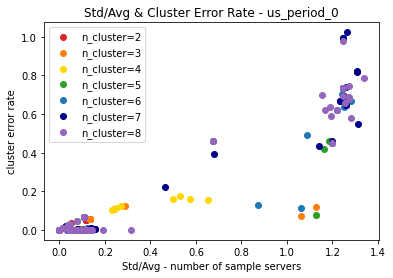

20
err is nan: 7
29
err is nan: 25
39
err is nan: 32
49
err is nan: 5
59
err is nan: 20
err is nan: 38
err is nan: 51
67
err is nan: 25
err is nan: 62
err is nan: 72
err is nan: 73
76


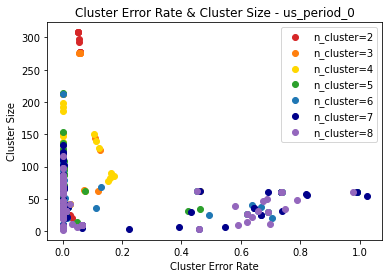

del list: [12, 26, 36, 40, 52, 57, 63, 67, 69]
61
corr (min_class_size, err): [[ 1.         -0.25315187]
 [-0.25315187  1.        ]]
del list: [50]
len(min_cluster_err): 60
min_cluster_bias_proportion: 0.005132027443667695
min_cluster_err: 0.12007542400254682
drop index: Int64Index([], dtype='int64')

period_choose: 0


,n_cluster,cluster_err,std/avg,cluster_size
n_cluster,1.000000,0.149365,0.155766,-0.433762
cluster_err,0.149365,1.000000,0.934658,-0.143050
std/avg,0.155766,0.934658,1.000000,-0.160073
cluster_size,-0.433762,-0.143050,-0.160073,1.000000


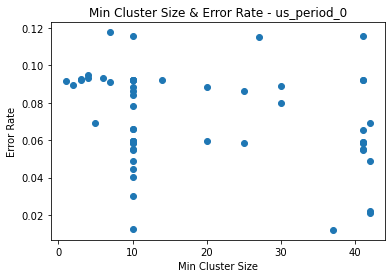

In [29]:
# scatter plot
# error rate in each class

period_choose = 0
n_clusters = [2,3,4,5,6,7,8]

# dataFrame for each cluster (class)
data_cluster_df = pd.DataFrame(columns = ['n_cluster', 'cluster_err', 'std/avg', 'cluster_size'], index=list(range(10*(np.sum(n_clusters)))))

# dataFrame for each clustering result
data_df = pd.DataFrame(columns = ['n_cluster', 'err', 'mean_std/avg', 'max_std/avg', 'min_cluster_size', 'min_cluster_err'], index=list(range(70)))

if period_choose == 0:
    ip_trans_count_dict = ip_trans_count_dict_p0
    baseline_ip_sum = baseline_ip_sum_p0
    s_dbw_record = s_dbw_record_p0
elif period_choose == 1:
    ip_trans_count_dict = ip_trans_count_dict_p1
    baseline_ip_sum = baseline_ip_sum_p1
    s_dbw_record = s_dbw_record_p1

# min_class_size for each clustering result
min_class_size = []
err_record = []
min_cluster_bias_proportion = [] # np.mean(bias_class[min_cluster_index]/est_sum[min_cluster_index])
min_cluster_err = []

# err & std/avg for each clusters
mean_class_err_record = []
std_avg_sample_num_record = []
cluster_size_record = []
index = 0 # for dataFrame
for n_cluster in n_clusters:
    #print(f'n_cluster: {n_cluster}')
    mean_class_err_record.append([])
    std_avg_sample_num_record.append([])
    cluster_size_record.append([])
    for label in range(10):
        #print(f'label: {label}')
        # baseline number in class
        baseline_num_class, class_ip_index = baseline_class(period_choose, n_cluster, label)
        baseline_num_class = np.array(baseline_num_class)
        #print(f'baseline_num_class: {baseline_num_class}')
        
        # estimation number in class
        est_p, _ = r_label_2_p2(period_choose, n_cluster, label)
        sum_ch, ch_in_class = get_p1_caputure_history(period_choose, n_cluster, label)
        est_p, sum_ch = np.array(est_p), np.array(sum_ch)
        est_num_class = sum_ch[:, 1:] / est_p
        #print(f'est_num_class: {est_num_class}')
        err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
        #print(f'err_class: {err_class}')
        
        # total est number
        est_sum = np.sum(est_num_class, axis=0)
        class_sizes = []
        for _class in range(n_cluster):
            class_sizes.append(len(class_ip_index[_class]))
            #print(f'class_{_class}, err_mean: {np.mean(err_class[_class])}, std(sum_ch)/avg(sum_ch): {np.std(sum_ch[_class])/np.mean(sum_ch[_class])}')
            #if np.std(sum_ch[_class])/np.mean(sum_ch[_class]) < -0.3: # np.std(sum_ch[_class])/np.mean(sum_ch[_class])
            #    continue
            #if np.mean(err_class[_class]) > 2:
            #    continue
            mean_class_err_record[-1].append(np.mean(err_class[_class]))
            std_avg_sample_num_record[-1].append(np.std(sum_ch[_class])/np.mean(sum_ch[_class]))
            cluster_size_record[-1].append(len(class_ip_index[_class]))
            
            # dataFrame
            data_cluster_df['n_cluster'][index] = n_cluster
            data_cluster_df['cluster_err'][index] = mean_class_err_record[-1][-1]
            data_cluster_df['std/avg'][index] = std_avg_sample_num_record[-1][-1]
            data_cluster_df['cluster_size'][index] = len(class_ip_index[_class])
            index += 1
        #print(f'min class size: {min(class_sizes)}')
        min_class_size.append(min(class_sizes))
        err_record.append(np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2]))
        # bias in min cluster
        min_cluster_index = class_sizes.index(min(class_sizes))
        bias_class = np.abs(est_num_class[:,1:-2] - baseline_num_class[:,2:-2])
        nan_in_bias_class = False
        for bias in bias_class[min_cluster_index]:
            if np.isnan(bias):
                nan_in_bias_class = True
        if not nan_in_bias_class:
            min_cluster_bias_proportion.append(np.mean(bias_class[min_cluster_index]/est_sum[1:-2]))
            min_cluster_err.append(np.mean(err_class[min_cluster_index]))
        #print(f'min_cluster_bias_proportion: {min_cluster_bias_proportion[-1]}')
        #print(f'min_cluster_err: {min_cluster_err[-1]}')
        data_df_index = (n_cluster-2)*10 + label
        data_df['n_cluster'][data_df_index] = n_cluster
        data_df['err'][data_df_index] = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])
        data_df['mean_std/avg'][data_df_index] = np.mean(std_avg_sample_num_record[-1])
        data_df['max_std/avg'][data_df_index] = max(std_avg_sample_num_record[-1])
        data_df['min_cluster_size'][data_df_index] = min(class_sizes)
        data_df['min_cluster_err'][data_df_index] = np.mean(err_class[min_cluster_index])
                       
    
# scatter plot - sample num std & err mean

plt.title(f'Std/Avg & Cluster Error Rate - {data_loc}_period_{period_choose}')
plt.xlabel('Std/Avg - number of sample servers')
plt.ylabel('cluster error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

err_sum=0
err_num=0
for n_cluster in range(7):
    _cluster = n_cluster+2
    print(f'n_cluster: {_cluster}')
    plt.scatter(std_avg_sample_num_record[n_cluster], mean_class_err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    #print(f'max_err: {max(mean_class_err_record[n_cluster])}')
    #print(f'min_std/avg: {min(std_avg_sample_num_record[n_cluster])}')
    #print(mean_class_err_record[n_cluster])
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            print(f'err is nan: {err_i}')
            continue
        err_sum += err
        err_num += 1
        err_num_class += 1
    print(err_num_class)
    
    
plt.legend()
plt.show()
# scatter plot - err mean & Cluster size

plt.title(f'Cluster Error Rate & Cluster Size - {data_loc}_period_{period_choose}')
plt.xlabel('Cluster Error Rate')
plt.ylabel('Cluster Size')
#plt.scatter(data_cluster_df['cluster_err'], data_cluster_df['cluster_size'])

for n_cluster in range(7):  #range(6,-1,-1):
    _cluster = n_cluster+2
    plt.scatter(mean_class_err_record[n_cluster], cluster_size_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            print(f'err is nan: {err_i}')
            continue
        err_sum += err
        err_num += 1
        err_num_class += 1
    print(err_num_class)
    
    
plt.legend()
plt.show()


# scatter plot - err mean & min class size
plt.title(f'Min Cluster Size & Error Rate - {data_loc}_period_{period_choose}')
plt.xlabel('Min Cluster Size')
plt.ylabel('Error Rate')
        
plt.scatter(min_class_size, err_record)

del_nan_list = []
for i in range(len(err_record)):
    if np.isnan(err_record[i]):
        del_nan_list.append(i)
print(f'del list: {del_nan_list}')
min_class_size=np.delete(min_class_size, del_nan_list)
err_record=np.delete(err_record, del_nan_list)
print(len(err_record))
print(f'corr (min_class_size, err): {np.corrcoef(min_class_size, err_record)}')
#print(f'min_cluster_bias_proportion: {min_cluster_bias_proportion}')
#print(f'min_cluster_err: {min_cluster_err}')

min_cluster_err, del_nan_list = get_del_nan_list(min_cluster_err)
print(f'len(min_cluster_err): {len(min_cluster_err)}')
print(f'min_cluster_bias_proportion: {np.mean(np.delete(min_cluster_bias_proportion, del_nan_list))}')
print(f'min_cluster_err: {np.mean(min_cluster_err)}')


# Delete these row indexes from dataFrame
indexNames = data_cluster_df[ data_cluster_df['cluster_err'] == 'None' ].index
print(f'drop index: {indexNames}')
data_cluster_df.drop(indexNames , inplace=True)

# correlation matrix
print(f'\nperiod_choose: {period_choose}')
data_cluster_df.astype('float64').corr()

period_choose: 1


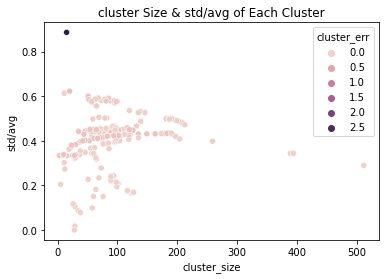

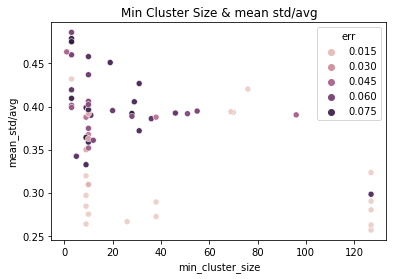

data_df corr matrix
period_choose: 1


,n_cluster,err,mean_std/avg,max_std/avg,min_cluster_size,min_cluster_err
n_cluster,1.000000,0.719256,0.855740,0.606245,-0.673990,0.357055
err,0.719256,1.000000,0.693093,0.534509,-0.524594,0.310516
mean_std/avg,0.855740,0.693093,1.000000,0.780306,-0.622249,0.374425
max_std/avg,0.606245,0.534509,0.780306,1.000000,-0.411534,0.151894
min_cluster_size,-0.673990,-0.524594,-0.622249,-0.411534,1.000000,-0.681779
min_cluster_err,0.357055,0.310516,0.374425,0.151894,-0.681779,1.000000


In [23]:
# x-min size, y-std/avg, heatmap: err rate
print(f'period_choose: {period_choose}')

# for each cluster
sns.scatterplot(data=data_cluster_df, x="cluster_size", y="std/avg", hue="cluster_err").set(title='cluster Size & std/avg of Each Cluster')
plt.show()

# for each clustering result
sns.scatterplot(data=data_df, x="min_cluster_size", y="mean_std/avg", hue="err").set(title='Min Cluster Size & mean std/avg')
plt.show()

print(f'data_df corr matrix')
print(f'period_choose: {period_choose}')
data_df.astype('float64').corr()

In [24]:
a=[1,2,3,4,5,6,0]
b=[3,5,4,3,4,5,9]
np.corrcoef(a,b)
#a=np.array(a)
del_list = [0,2,3]
#a=np.delete(a, del_list)
a
a.index(min(a))


6

In [25]:
for i in range(6,-1,-1):
    print(i)

6
5
4
3
2
1
0
